# Thư viện cần thiết và đọc dữ liệu

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [62]:
shop = pd.read_csv("D:/Khoa luan tn/archive/file.csv", index_col='Unnamed: 0')
shop.head()

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


Mô tả các cột:

CustomerID: Mã định danh duy nhất cho từng khách hàng.

Gender: Giới tính của khách hàng (ví dụ: Nam, Nữ).

Location: Thông tin về địa điểm hoặc địa chỉ của khách hàng.

Tenure_Months: Số tháng khách hàng được liên kết với nền tảng.

Transaction_ID: Mã định danh duy nhất cho từng giao dịch.

Transaction_Date: Ngày giao dịch.

Product_SKU: Mã định danh Đơn vị lưu kho (SKU) cho sản phẩm.

Product_Description: Mô tả sản phẩm.

Product_Category: Danh mục mà sản phẩm thuộc về.

Quantity: Số lượng sản phẩm đã mua trong giao dịch.

Avg_Price: Giá trung bình của sản phẩm.

Delivery_Charges: Các khoản phí liên quan đến việc giao sản phẩm.

Coupon_Status: Trạng thái của phiếu giảm giá liên quan đến giao dịch.

GST: Thuế hàng hóa và dịch vụ liên quan đến giao dịch.

Date: Ngày giao dịch (có khả năng trùng lặp với Transaction_Date).

Offline_Spend: Số tiền khách hàng chi tiêu ngoại tuyến.

Online_Spend: Số tiền khách hàng chi tiêu trực tuyến.

Month: Tháng giao dịch.

Coupon_Code: Mã liên kết với phiếu giảm giá, nếu có.

Discount_pct: Tỷ lệ phần trăm chiết khấu áp dụng cho giao dịch.

In [63]:
print(f"Có {len(shop.columns)} cột trong tập dữ liệu.")
print(f"Có {len(shop)} hàng trong tập dữ liệu.")

Có 20 cột trong tập dữ liệu.
Có 52955 hàng trong tập dữ liệu.


In [64]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52955 entries, 0 to 52954
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  float64
 1   Gender               52924 non-null  object 
 2   Location             52924 non-null  object 
 3   Tenure_Months        52924 non-null  float64
 4   Transaction_ID       52924 non-null  float64
 5   Transaction_Date     52924 non-null  object 
 6   Product_SKU          52924 non-null  object 
 7   Product_Description  52924 non-null  object 
 8   Product_Category     52955 non-null  object 
 9   Quantity             52924 non-null  float64
 10  Avg_Price            52924 non-null  float64
 11  Delivery_Charges     52924 non-null  float64
 12  Coupon_Status        52924 non-null  object 
 13  GST                  52924 non-null  float64
 14  Date                 52924 non-null  object 
 15  Offline_Spend        52924 non-null  floa

# Tiền xử lý

In [65]:
# Xem số lượng dữ liệu thiếu trong mỗi cột
shop.isnull().sum()

CustomerID              31
Gender                  31
Location                31
Tenure_Months           31
Transaction_ID          31
Transaction_Date        31
Product_SKU             31
Product_Description     31
Product_Category         0
Quantity                31
Avg_Price               31
Delivery_Charges        31
Coupon_Status           31
GST                     31
Date                    31
Offline_Spend           31
Online_Spend            31
Month                    0
Coupon_Code            400
Discount_pct           400
dtype: int64

In [66]:
shop[shop.isnull().any(axis=1)]

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
3895,17850.0,M,Chicago,12.0,16704.0,2019-01-01,GGOEYOBR078599,YouTube Luggage Tag,Fun,4.0,9.27,6.50,Used,0.18,1/1/2019,4500.0,2424.50,1,NaN,NaN
3896,17850.0,M,Chicago,12.0,18076.0,2019-01-17,GGOEAOBH078799,Android Luggage Tag,Fun,2.0,7.42,6.50,Clicked,0.18,1/17/2019,3000.0,417.73,1,NaN,NaN
3897,14060.0,F,Chicago,22.0,18459.0,2019-01-21,GGOEYOBR078599,YouTube Luggage Tag,Fun,1.0,9.27,6.50,Used,0.18,1/21/2019,3000.0,640.93,1,NaN,NaN
3898,15061.0,M,California,7.0,18896.0,2019-01-26,GGOEGOBC078699,Google Luggage Tag,Fun,3.0,7.42,62.74,Not Used,0.18,1/26/2019,1000.0,937.58,1,NaN,NaN
3899,18074.0,F,California,10.0,16782.0,2019-01-02,GGOEGOBC078699,Google Luggage Tag,Fun,1.0,7.42,6.50,Used,0.18,1/2/2019,4500.0,3480.36,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gift Cards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,GC20,20.0
52951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notebooks & Journals,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NJ20,20.0
52952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,AND10,10.0
52953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,AND20,20.0


In [67]:
shop.tail(31)

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
52924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NOTES10,10.0
52925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NOTES20,20.0
52926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NOTES30,30.0
52927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NE10,10.0
52928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NE20,20.0
52929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NE30,30.0
52930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Accessories,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,ACC20,20.0
52931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NOTES10,10.0
52932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NOTES20,20.0
52933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NOTES30,30.0


Xóa giá trị thiếu

In [68]:
# Xóa 31 giá trị thiếu
shop_cleaned = shop[:-31]

In [69]:
shop_cleaned

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,17850.0,M,Chicago,12.0,16679.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0
1,17850.0,M,Chicago,12.0,16680.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0
2,17850.0,M,Chicago,12.0,16696.0,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0
3,17850.0,M,Chicago,12.0,16699.0,2019-01-01,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0
4,17850.0,M,Chicago,12.0,16700.0,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.10,1/1/2019,4500.0,2424.50,1,ELEC10,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,13155.0,F,California,8.0,22504.0,2019-03-10,GGOEGGCX056399,Gift Card - $250.00,Gift Cards,1.0,250.00,0.0,Clicked,0.05,3/10/2019,2500.0,1294.22,3,GC30,30.0
52920,18077.0,M,Chicago,34.0,24250.0,2019-03-28,GGOEGGCX056299,Gift Card - $25.00,Gift Cards,1.0,25.00,0.0,Used,0.05,3/28/2019,2000.0,1066.12,3,GC30,30.0
52921,16085.0,M,California,15.0,39991.0,2019-10-06,GGOEGOCD078399,Google Leather Perforated Journal,Notebooks & Journals,1.0,10.80,6.0,Clicked,0.05,10/6/2019,3000.0,2230.76,10,NJ10,10.0
52922,16085.0,M,California,15.0,39991.0,2019-10-06,GGOEGOCR078499,Google Spiral Leather Journal,Notebooks & Journals,1.0,9.60,6.0,Used,0.05,10/6/2019,3000.0,2230.76,10,NJ10,10.0


Thay thế giá trị thiếu

In [70]:
# Không xóa các hàng có giá trị null trong cột "Coupon_Code" và "Discount_pct" vì có thể hiểu rằng đây là những giao dịch diễn ra mà không sử dụng mã giảm giá hoặc mã phiếu giảm giá.
# Điền giá trị thiếu cho Coupon_Code và Discount_pct
shop_cleaned["Coupon_Code"] = shop_cleaned["Coupon_Code"].fillna("No Coupon")
shop_cleaned["Discount_pct"] = shop_cleaned["Discount_pct"].fillna(0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10744\4187817532.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shop_cleaned["Coupon_Code"] = shop_cleaned["Coupon_Code"].fillna("No Coupon")
C:\Users\Admin\AppData\Local\Temp\ipykernel_10744\4187817532.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shop_cleaned["Discount_pct"] = shop_cleaned["Discount_pct"].fillna(0)


In [71]:
shop_cleaned.isnull().sum()

CustomerID             0
Gender                 0
Location               0
Tenure_Months          0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
GST                    0
Date                   0
Offline_Spend          0
Online_Spend           0
Month                  0
Coupon_Code            0
Discount_pct           0
dtype: int64

In [72]:
shop_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52924 entries, 0 to 52923
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  float64
 1   Gender               52924 non-null  object 
 2   Location             52924 non-null  object 
 3   Tenure_Months        52924 non-null  float64
 4   Transaction_ID       52924 non-null  float64
 5   Transaction_Date     52924 non-null  object 
 6   Product_SKU          52924 non-null  object 
 7   Product_Description  52924 non-null  object 
 8   Product_Category     52924 non-null  object 
 9   Quantity             52924 non-null  float64
 10  Avg_Price            52924 non-null  float64
 11  Delivery_Charges     52924 non-null  float64
 12  Coupon_Status        52924 non-null  object 
 13  GST                  52924 non-null  float64
 14  Date                 52924 non-null  object 
 15  Offline_Spend        52924 non-null  floa

In [73]:
# Kiểm tra giá trị 'ngày' trong cột "Transaction_Date" so với 'Date' giống nhau hay không?
shop_cleaned.loc[:, 'Transaction_Date'] = pd.to_datetime(shop_cleaned['Transaction_Date']).dt.strftime('%d-%m-%y')
shop_cleaned.loc[:, 'Date'] = pd.to_datetime(shop_cleaned['Date'], format='%m/%d/%Y').dt.strftime('%d-%m-%y')

In [74]:
shop_cleaned.loc[:,'date_match'] = shop_cleaned['Date'] == shop_cleaned['Transaction_Date']
shop_cleaned['date_match'].sum() == len(shop_cleaned)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10744\398509757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shop_cleaned.loc[:,'date_match'] = shop_cleaned['Date'] == shop_cleaned['Transaction_Date']


True

Xóa cột trùng lặp

In [75]:
# Vì giống nhau nên xóa cột "Date"
shop_cleaned = shop_cleaned.drop(columns=['Date','date_match'])

In [76]:
# Thống kê dữ liệu
shop_cleaned.describe()

,CustomerID,Tenure_Months,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,GST,Offline_Spend,Online_Spend,Month,Discount_pct
count,52924.00000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000,52924.000000
mean,15346.70981,26.127995,32409.825675,4.497638,52.237646,10.517630,0.137462,2830.914141,1893.109119,6.652388,19.802358
std,1766.55602,13.478285,8648.668977,20.104711,64.006882,19.475613,0.045825,936.154247,807.014092,3.333364,8.278878
min,12346.00000,2.000000,16679.000000,1.000000,0.390000,0.000000,0.050000,500.000000,320.250000,1.000000,0.000000
25%,13869.00000,15.000000,25384.000000,1.000000,5.700000,6.000000,0.100000,2500.000000,1252.630000,4.000000,10.000000
50%,15311.00000,27.000000,32625.500000,1.000000,16.990000,6.000000,0.180000,3000.000000,1837.870000,7.000000,20.000000
75%,16996.25000,37.000000,39126.250000,2.000000,102.130000,6.500000,0.180000,3500.000000,2425.350000,9.000000,30.000000
max,18283.00000,50.000000,48497.000000,900.000000,355.740000,521.360000,0.180000,5000.000000,4556.930000,12.000000,30.000000


Note: Loại bỏ giá trị ngoại lai

Text(0.5, 0, 'Thuộc tính')

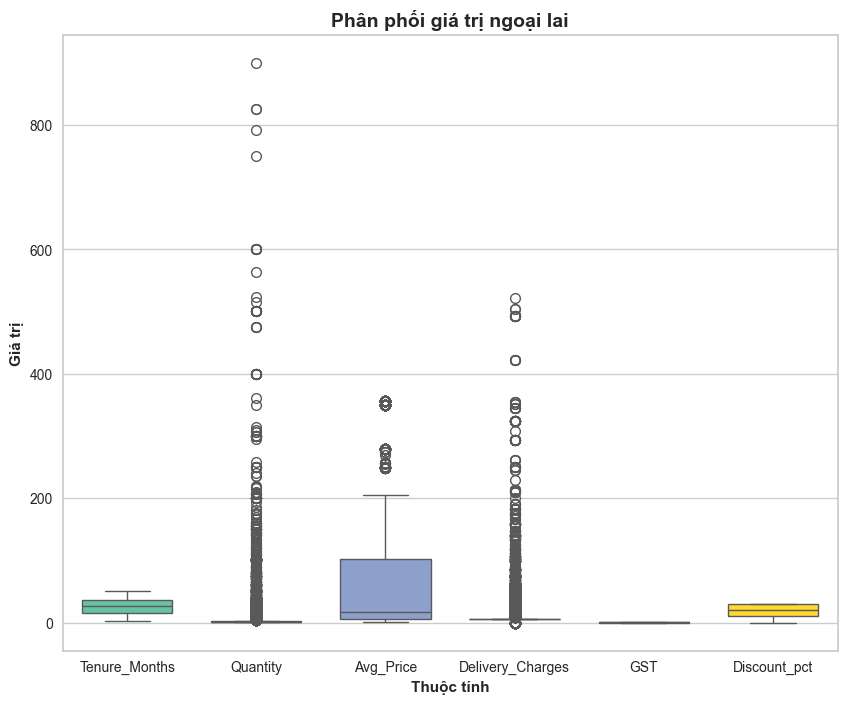

In [77]:
#Phân tích sự phân bố của giá trị ngoại lai
list = ['Tenure_Months','Quantity','Avg_Price','Delivery_Charges','GST','Discount_pct']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = shop_cleaned[list], orient="v", palette="Set2", whis=1.5, saturation=1, width=0.7)
plt.title("Phân phối giá trị ngoại lai", fontsize = 14, fontweight = 'bold')
plt.ylabel("Giá trị", fontweight = 'bold')
plt.xlabel("Thuộc tính", fontweight = 'bold')

In [78]:
#Xóa các giá trị ngoại lai (outlier)
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    return column[(column >= Q1 - 1.5*IQR) & (column <= Q3 + 1.5*IQR)]

for column in list:
    shop_cleaned[column] = remove_outliers(shop_cleaned[column])

In [79]:
shop_cleaned.isna().sum()

CustomerID                 0
Gender                     0
Location                   0
Tenure_Months              0
Transaction_ID             0
Transaction_Date           0
Product_SKU                0
Product_Description        0
Product_Category           0
Quantity                8284
Avg_Price                728
Delivery_Charges       10243
Coupon_Status              0
GST                        0
Offline_Spend              0
Online_Spend               0
Month                      0
Coupon_Code                0
Discount_pct               0
dtype: int64

In [80]:
#Tính toán phần trăm đóng góp của Giá trị bị thiếu trong DF
df_null = round(100*(shop_cleaned.isnull().sum())/len(shop_cleaned), 2)
df_null

CustomerID              0.00
Gender                  0.00
Location                0.00
Tenure_Months           0.00
Transaction_ID          0.00
Transaction_Date        0.00
Product_SKU             0.00
Product_Description     0.00
Product_Category        0.00
Quantity               15.65
Avg_Price               1.38
Delivery_Charges       19.35
Coupon_Status           0.00
GST                     0.00
Offline_Spend           0.00
Online_Spend            0.00
Month                   0.00
Coupon_Code             0.00
Discount_pct            0.00
dtype: float64

In [81]:
df = shop_cleaned.dropna()

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37697 entries, 0 to 52923
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           37697 non-null  float64
 1   Gender               37697 non-null  object 
 2   Location             37697 non-null  object 
 3   Tenure_Months        37697 non-null  float64
 4   Transaction_ID       37697 non-null  float64
 5   Transaction_Date     37697 non-null  object 
 6   Product_SKU          37697 non-null  object 
 7   Product_Description  37697 non-null  object 
 8   Product_Category     37697 non-null  object 
 9   Quantity             37697 non-null  float64
 10  Avg_Price            37697 non-null  float64
 11  Delivery_Charges     37697 non-null  float64
 12  Coupon_Status        37697 non-null  object 
 13  GST                  37697 non-null  float64
 14  Offline_Spend        37697 non-null  float64
 15  Online_Spend         37697 non-null  floa

# Chuẩn bị dữ liệu

In [83]:
# Thêm cột tổng chi tiêu
df['Total_Spend'] = (df['Quantity'] * df['Avg_Price'] * (1 - df['Discount_pct']/100)) + df['Delivery_Charges'] + df['GST']

C:\Users\Admin\AppData\Local\Temp\ipykernel_10744\3671988170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Spend'] = (df['Quantity'] * df['Avg_Price'] * (1 - df['Discount_pct']/100)) + df['Delivery_Charges'] + df['GST']


In [84]:
df

,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,GST,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct,Total_Spend
0,17850.0,M,Chicago,12.0,16679.0,01-01-19,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,4500.0,2424.50,1,ELEC10,10.0,144.939
1,17850.0,M,Chicago,12.0,16680.0,01-01-19,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Used,0.10,4500.0,2424.50,1,ELEC10,10.0,144.939
2,17850.0,M,Chicago,12.0,16696.0,01-01-19,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2.0,122.77,6.5,Not Used,0.10,4500.0,2424.50,1,ELEC10,10.0,227.586
3,17850.0,M,Chicago,12.0,16699.0,01-01-19,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,1.0,81.50,6.5,Clicked,0.10,4500.0,2424.50,1,ELEC10,10.0,79.950
4,17850.0,M,Chicago,12.0,16700.0,01-01-19,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1.0,153.71,6.5,Clicked,0.10,4500.0,2424.50,1,ELEC10,10.0,144.939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52913,14524.0,F,New York,15.0,28700.0,23-05-19,GGOEGBMB073599,Google Collapsible Duffel Black,More Bags,1.0,21.99,6.0,Clicked,0.18,1000.0,1196.03,5,No Coupon,0.0,28.170
52914,14031.0,F,Chicago,17.0,19075.0,29-01-19,GGOEGBPB081999,UpCycled Bike Saddle Bag,Accessories,1.0,51.57,6.5,Clicked,0.10,700.0,836.13,1,ACC10,10.0,53.013
52921,16085.0,M,California,15.0,39991.0,06-10-19,GGOEGOCD078399,Google Leather Perforated Journal,Notebooks & Journals,1.0,10.80,6.0,Clicked,0.05,3000.0,2230.76,10,NJ10,10.0,15.770
52922,16085.0,M,California,15.0,39991.0,06-10-19,GGOEGOCR078499,Google Spiral Leather Journal,Notebooks & Journals,1.0,9.60,6.0,Used,0.05,3000.0,2230.76,10,NJ10,10.0,14.690


In [85]:
# Tạo tập dữ liệu đặc trưng cho phân khúc khách hàng
customer_analystics = df.groupby("CustomerID").agg({
    "Transaction_ID": "count",  # Số lần giao dịch
    "Quantity": "sum",          # Tổng số lượng sản phẩm đã mua
    "Tenure_Months": "first",      # Số tháng liên kết nền tảng
    "Total_Spend": "sum",
    "Gender": "first",
    "Location": "first"
}).rename(columns={"Transaction_ID": "Total_Transaction", "Quantity": "Total_Products"})

In [87]:
customer_analystics

,Total_Transaction,Total_Products,Tenure_Months,Total_Spend,Gender,Location
CustomerID,,,,,,
12347.0,38,49.0,20.0,2531.019,M,New York
12348.0,15,24.0,39.0,545.119,M,California
12350.0,13,17.0,25.0,634.451,M,California
12356.0,27,37.0,31.0,908.600,F,Chicago
12359.0,6,10.0,41.0,197.294,M,New York
...,...,...,...,...,...,...
18259.0,2,2.0,5.0,40.301,F,California
18260.0,23,25.0,43.0,903.185,M,New York
18269.0,8,10.0,25.0,141.326,M,Chicago


In [88]:
damo = ["Total_Transaction", "Total_Products", "Tenure_Months", "Total_Spend"]
customer_features = customer_analystics[damo]

In [89]:
customer_features

,Total_Transaction,Total_Products,Tenure_Months,Total_Spend
CustomerID,,,,
12347.0,38,49.0,20.0,2531.019
12348.0,15,24.0,39.0,545.119
12350.0,13,17.0,25.0,634.451
12356.0,27,37.0,31.0,908.600
12359.0,6,10.0,41.0,197.294
...,...,...,...,...
18259.0,2,2.0,5.0,40.301
18260.0,23,25.0,43.0,903.185
18269.0,8,10.0,25.0,141.326


#Phân tích sự phân bố của giá trị ngoại lai 
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = customer_features, orient="v", palette="Set2", whis=1.5, saturation=1, width=0.7)
plt.title("Phân phối giá trị ngoại lai", fontsize = 14, fontweight = 'bold')
plt.ylabel("Giá trị", fontweight = 'bold')
plt.xlabel("Thuộc tính", fontweight = 'bold')

In [90]:
scaler = StandardScaler()
customer_features_scaled = scaler.fit_transform(customer_features)

In [91]:
customer_features_scaled

array([[ 0.31408172,  0.35336499, -0.42835967,  0.36495755],
       [-0.31461996, -0.19688142,  0.93933373, -0.48093941],
       [-0.36928967, -0.35095041, -0.06844035, -0.44288832],
       ...,
       [-0.50596395, -0.50501941, -0.06844035, -0.65293562],
       [-0.69730794, -0.68109826,  1.51520463, -0.59629515],
       [ 1.07945768,  0.92562126,  0.72338214,  0.61287747]])

## Lựa chọn K cụm

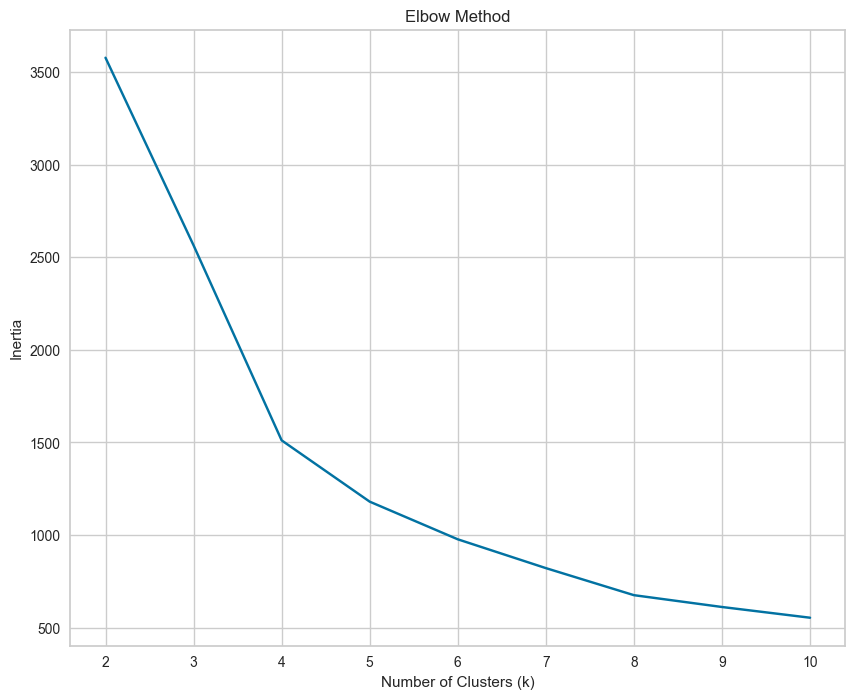

In [92]:
# Phương pháp Elbow
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_features_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

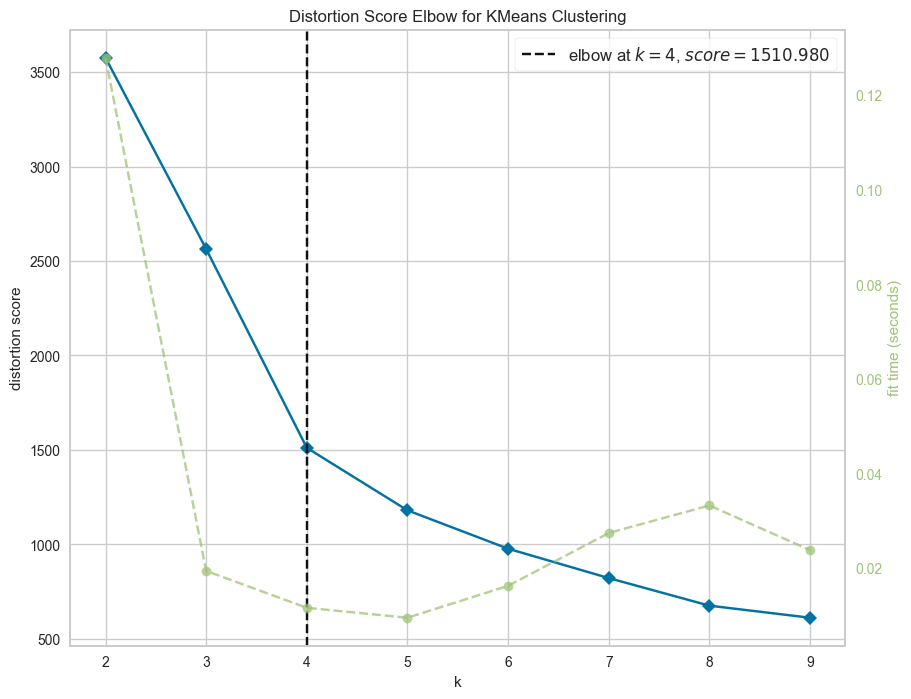

In [93]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(customer_features_scaled)
visualizer.show()
plt.show()

In [94]:
customer_features_scaled

array([[ 0.31408172,  0.35336499, -0.42835967,  0.36495755],
       [-0.31461996, -0.19688142,  0.93933373, -0.48093941],
       [-0.36928967, -0.35095041, -0.06844035, -0.44288832],
       ...,
       [-0.50596395, -0.50501941, -0.06844035, -0.65293562],
       [-0.69730794, -0.68109826,  1.51520463, -0.59629515],
       [ 1.07945768,  0.92562126,  0.72338214,  0.61287747]])

In [95]:
#Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    #Khởi tạo
    kmeans = KMeans(n_clusters = num_clusters, max_iter=50)
    kmeans.fit(customer_features_scaled)
    
    cluster_labels = kmeans.labels_
    
    #Silhouette score
    silhouette_avg = silhouette_score(customer_features_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6795180705186465
For n_clusters=3, the silhouette score is 0.4750967167794162
For n_clusters=4, the silhouette score is 0.4249895552606337
For n_clusters=5, the silhouette score is 0.42342970062222707
For n_clusters=6, the silhouette score is 0.40776522998373427
For n_clusters=7, the silhouette score is 0.3881379048046327
For n_clusters=8, the silhouette score is 0.3792054911588111


# Xây dựng mô hình phân cụm

In [101]:
# Chọn k tốt nhất từ Elbow và Silhouette (k=4)
k_best = 4
kmeans = KMeans(n_clusters=k_best, random_state=42)
kmeans.fit(customer_features_scaled)
labels = kmeans.labels_

# Gán nhãn cụm vào DataFrame
customer_analystics['Cluster'] = labels

customer_features['Cluster'] = labels

In [97]:
#3. Đánh giá mô hình

# Chỉ số Silhouette
silhouette_avg = silhouette_score(customer_features_scaled, labels)
print(f"Silhouette Score: {silhouette_avg}")

# Chỉ số Davis-Bouldin
davies_bouldin = davies_bouldin_score(customer_features_scaled, labels)
print(f"Davis-Bouldin Score: {davies_bouldin}")

# Chỉ số Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(customer_features_scaled, labels)
print(f"Calinski-Harabasz Score: {calinski_harabasz}")

Silhouette Score: 0.42256922899145416
Davis-Bouldin Score: 0.7073469223116186
Calinski-Harabasz Score: 1306.6601541029245


n_clusters = 2: Điểm silhouette trung bình = 0.67


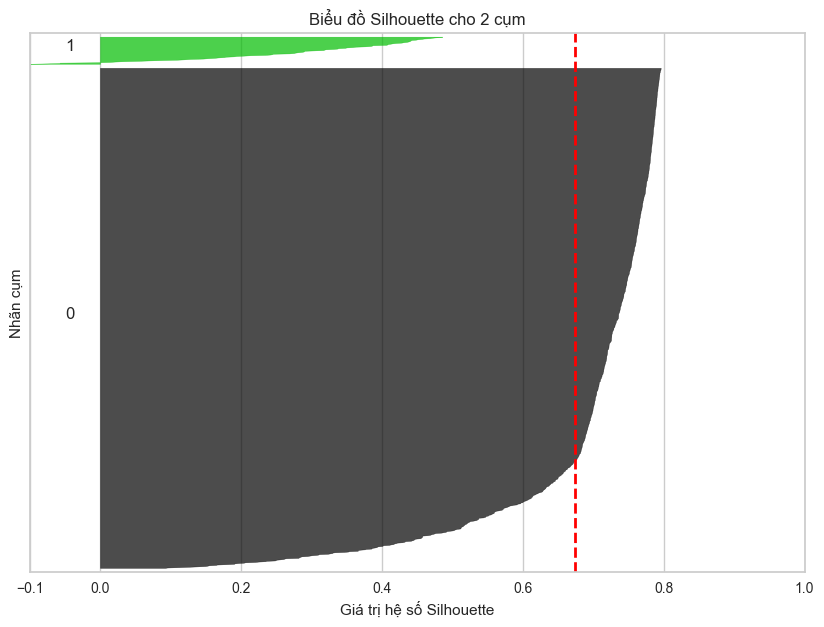

n_clusters = 3: Điểm silhouette trung bình = 0.39


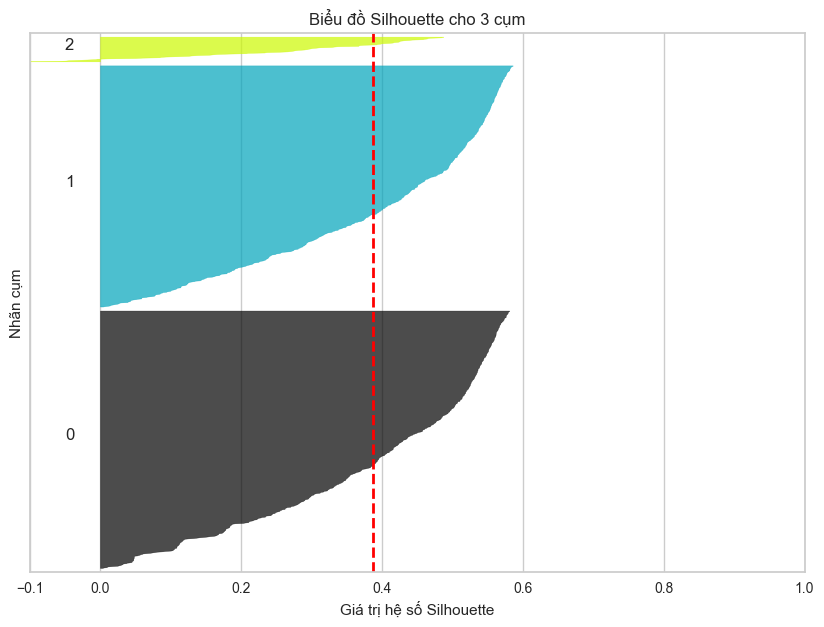

n_clusters = 4: Điểm silhouette trung bình = 0.42


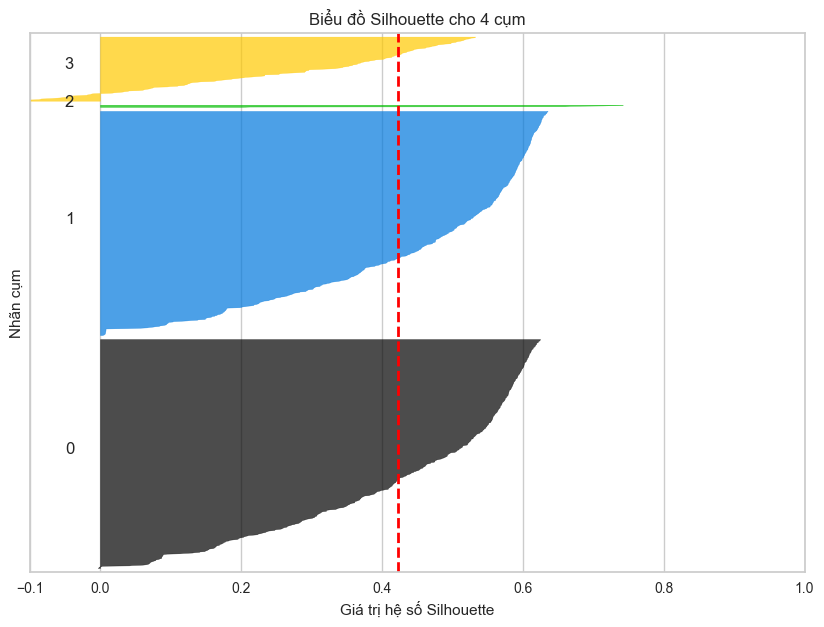

n_clusters = 5: Điểm silhouette trung bình = 0.42


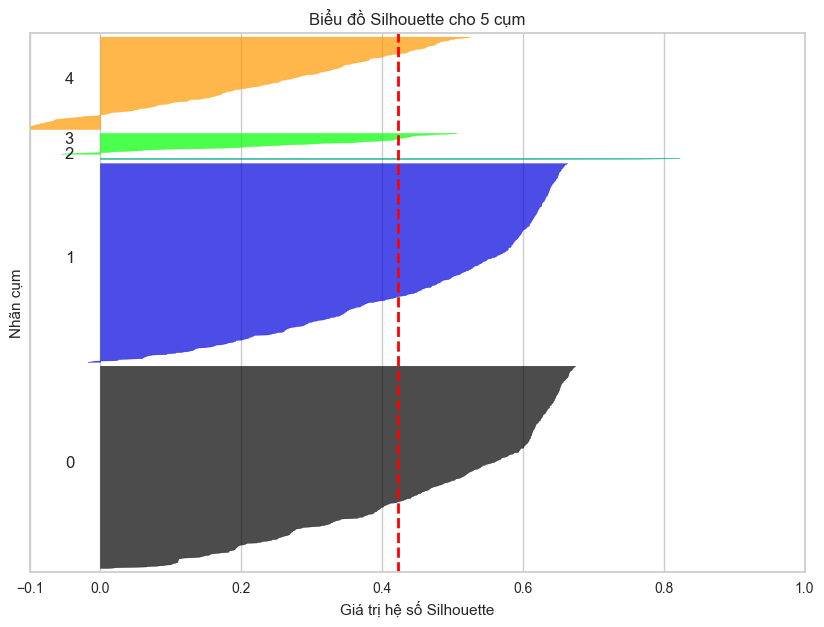

In [98]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Thay thế X bằng dữ liệu của bạn
# X = ...

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Khởi tạo KMeans
    kmeans = KMeans(n_clusters=n_clusters, max_iter=50, random_state=42)
    cluster_labels = kmeans.fit_predict(customer_features_scaled)

    # Tính silhouette score
    silhouette_avg = silhouette_score(customer_features_scaled, cluster_labels)
    print(f"n_clusters = {n_clusters}: Điểm silhouette trung bình = {silhouette_avg:.2f}")

    # Tính toán silhouette scores cho từng mẫu
    sample_silhouette_values = silhouette_samples(customer_features_scaled, cluster_labels)

    # Tạo figure
    plt.figure(figsize=(10, 7))
    plt.xlim([-0.1, 1])
    plt.ylim([0, len(customer_features_scaled) + (n_clusters + 1) * 10])

    y_lower = 10
    for i in range(n_clusters):
        # Gom nhóm các silhouette scores cho từng cụm và sắp xếp
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7
        )

        # Thêm nhãn số cụm ở giữa
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # Khoảng cách 10 giữa các cụm

    # Đường thẳng đứng thể hiện điểm trung bình
    plt.axvline(x=silhouette_avg, color="red", linestyle="--", linewidth=2)
    
    plt.title(f"Biểu đồ Silhouette cho {n_clusters} cụm")
    plt.xlabel("Giá trị hệ số Silhouette")
    plt.ylabel("Nhãn cụm")
    plt.yticks([])  # Ẩn trục y
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

In [100]:
customer_features

,Total_Transaction,Total_Products,Tenure_Months,Total_Spend,PCA1,PCA2
CustomerID,,,,,,
12347.0,38,49.0,20.0,2531.019,0.591853,0.434011
12348.0,15,24.0,39.0,545.119,-0.563031,-0.945313
12350.0,13,17.0,25.0,634.451,-0.671759,0.061886
12356.0,27,37.0,31.0,908.600,-0.123856,-0.365580
12359.0,6,10.0,41.0,197.294,-0.967727,-1.092764
...,...,...,...,...,...,...
18259.0,2,2.0,5.0,40.301,-1.195934,1.496833
18260.0,23,25.0,43.0,903.185,-0.333521,-1.230847
18269.0,8,10.0,25.0,141.326,-0.960588,0.059021


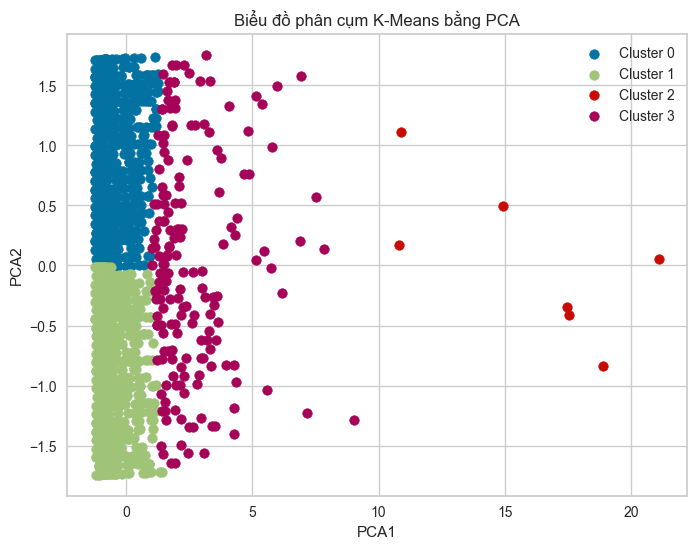

In [104]:
from sklearn.decomposition import PCA
# Chọn số cụm k tối ưu từ Elbow & Silhouette Score (giả sử k = 4)
optimal_k = 4
# Thực hiện PCA để giảm chiều dữ liệu xuống 2D
pca = PCA(n_components=2)
df_pca = pca.fit_transform(customer_features_scaled)

# Thêm kết quả PCA vào DataFrame
customer_features['PCA1'] = df_pca[:, 0]
customer_features['PCA2'] = df_pca[:, 1]

# Vẽ biểu đồ phân cụm theo PCA
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    subset = customer_features[customer_features['Cluster'] == cluster]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Biểu đồ phân cụm K-Means bằng PCA')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import davies_bouldin_score

best_n = 0
best_score = float('inf')

for n in range(2, 8):
    kmeans = KMeans(n_clusters=n, random_state=42)
    labels = kmeans.fit_predict(customer_features_scaled)
    score = davies_bouldin_score(customer_features_scaled, labels)
    print(f"For n_clusters = {n}, Davies-Bouldin score is {score}")

    if score < best_score:
        best_n = n
        best_score = score

print(f"Số cụm tốt nhất là {best_n} với chỉ số Davies-Bouldin thấp nhất bằng {best_score}")

In [ ]:
from sklearn.metrics import calinski_harabasz_score

best_n = 0
best_score = 0

for n in range(2, 8):
    kmeans = KMeans(n_clusters=n, random_state=42)
    labels = kmeans.fit_predict(customer_features_scaled)
    score = calinski_harabasz_score(customer_features_scaled, labels)
    print(f"For n_clusters = {n}, Calinski-Harabasz score is {score}")

    if score > best_score:
        best_n = n
        best_score = score

print(f"Số cụm tốt nhất là {best_n} với chỉ số Calinski-Harabasz cao nhất bằng {best_score}")

# Phân tích từng phân khúc khách hàng

In [108]:
customer_analystics.head(10)

,Total_Transaction,Total_Products,Tenure_Months,Total_Spend,Gender,Location,Cluster
CustomerID,,,,,,,
12347.0,38,49.0,20.0,2531.019,M,New York,0
12348.0,15,24.0,39.0,545.119,M,California,1
12350.0,13,17.0,25.0,634.451,M,California,0
12356.0,27,37.0,31.0,908.600,F,Chicago,1
12359.0,6,10.0,41.0,197.294,M,New York,1
12370.0,59,67.0,21.0,3194.995,F,New York,3
12373.0,12,12.0,23.0,364.202,F,New York,0
12377.0,55,72.0,27.0,4659.696,F,California,3
12383.0,51,62.0,32.0,2393.937,M,New York,1


In [106]:
# Đếm số lượng khách hàng trong mỗi cụm
cluster_counts = customer_analystics['Cluster'].value_counts()
print(cluster_counts)

Cluster
0    626
1    613
3    176
2      7
Name: count, dtype: int64


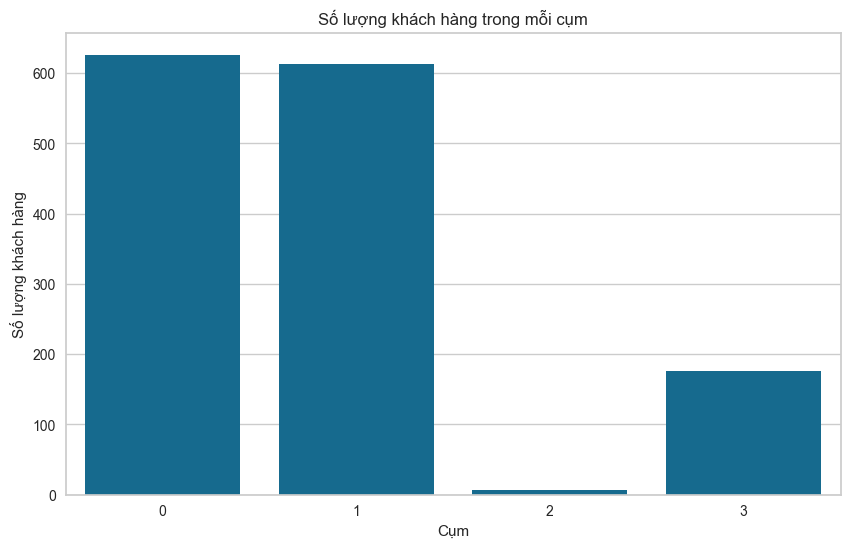

In [107]:
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.title('Số lượng khách hàng trong mỗi cụm')
plt.xlabel('Cụm')
plt.ylabel('Số lượng khách hàng')
plt.show()

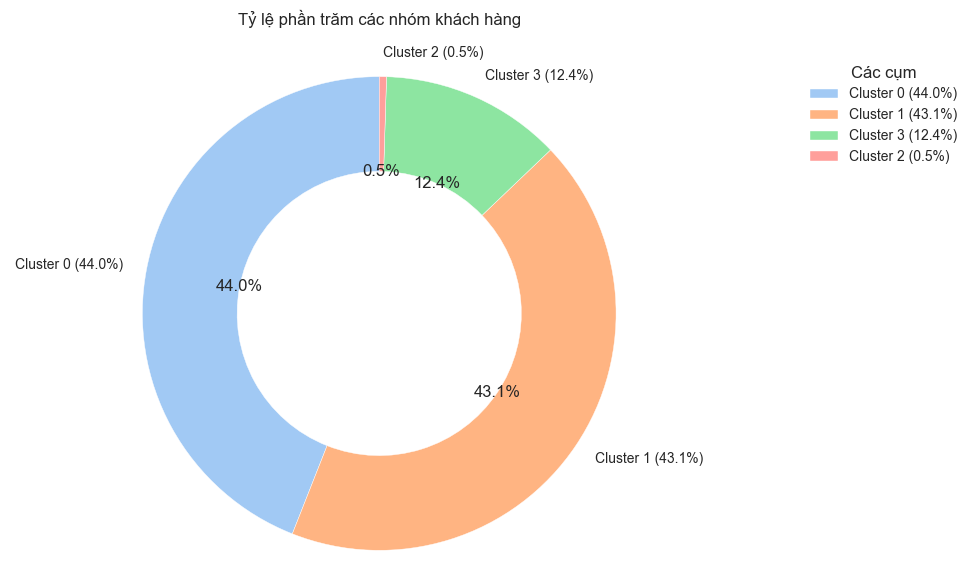

In [120]:
# Tính toán tỷ lệ phần trăm
cluster_counts = customer_analystics['Cluster'].value_counts()
cluster_percent = cluster_counts / cluster_counts.sum() * 100

# Vẽ biểu đồ tròn
plt.figure(figsize=(10, 6))
plt.pie(
    cluster_percent,
    labels=[f'Cluster {i} ({p:.1f}%)' for i, p in zip(cluster_percent.index, cluster_percent)],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel'),
    wedgeprops={'width': 0.4, 'edgecolor': 'w'}  # Tạo hiệu ứng donut nếu muốn
)

# Thêm tiêu đề và chỉnh đẹp
plt.title('Tỷ lệ phần trăm các nhóm khách hàng', pad=20)
plt.axis('equal')  # Đảm bảo hình tròn hoàn hảo

# Hiển thị chú giải nếu cần
plt.legend(
    title='Các cụm',
    loc='upper right',
    bbox_to_anchor=(1.3, 1)
)

plt.tight_layout()
plt.show()

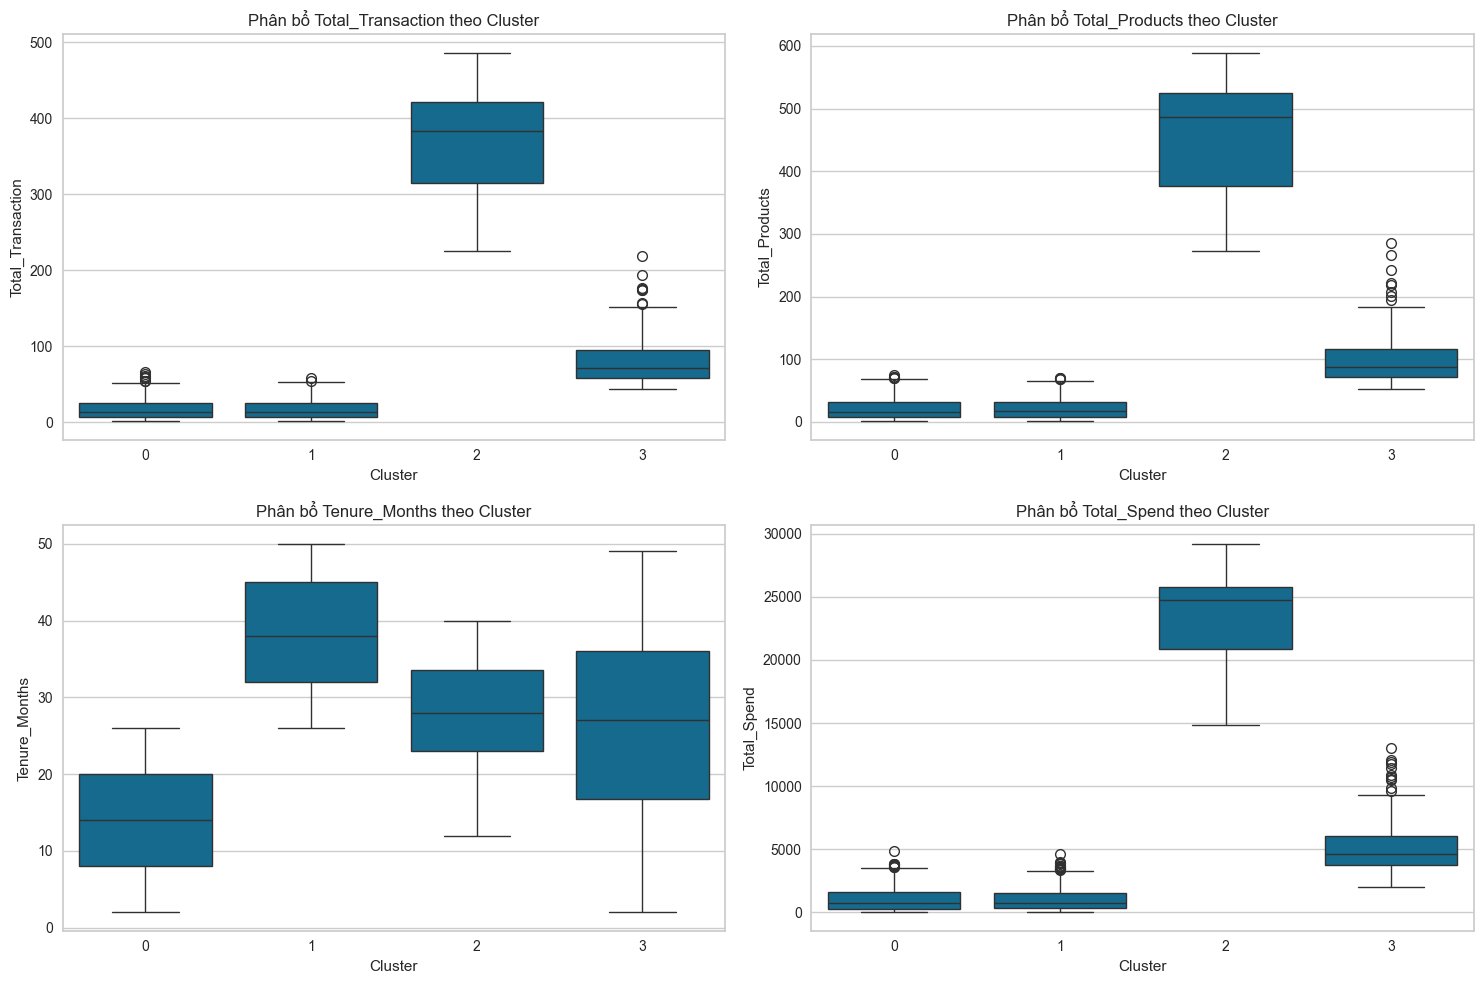


ĐẶC TRƯNG TỪNG NHÓM:

Cluster 0 - Casual Users (F-dominant từ California):
- Giao dịch TB: 16.9
- Sản phẩm TB: 21.0
- Thời gian sử dụng TB: 13.9 tháng
- Chi tiêu TB: 1063.7
- Giới tính phổ biến: F
- Vị trí hàng đầu: California

Cluster 1 - Casual Users (F-dominant từ Chicago):
- Giao dịch TB: 16.7
- Sản phẩm TB: 20.7
- Thời gian sử dụng TB: 38.2 tháng
- Chi tiêu TB: 1046.1
- Giới tính phổ biến: F
- Vị trí hàng đầu: Chicago

Cluster 2 - Big Spenders (F-dominant từ Chicago):
- Giao dịch TB: 366.4
- Sản phẩm TB: 450.3
- Thời gian sử dụng TB: 27.6 tháng
- Chi tiêu TB: 23152.4
- Giới tính phổ biến: F
- Vị trí hàng đầu: Chicago

Cluster 3 - Big Spenders (F-dominant từ Chicago):
- Giao dịch TB: 81.2
- Sản phẩm TB: 101.3
- Thời gian sử dụng TB: 26.1 tháng
- Chi tiêu TB: 5179.0
- Giới tính phổ biến: F
- Vị trí hàng đầu: Chicago


In [112]:
# 1. Phân tích thống kê cơ bản
cluster_summary = customer_analystics.groupby('Cluster').agg({
    'Total_Transaction': ['mean', 'median'],
    'Total_Products': ['mean', 'median'],
    'Tenure_Months': ['mean', 'median'],
    'Total_Spend': ['mean', 'median'],
    'Gender': lambda x: x.mode()[0],  # Lấy giới tính phổ biến
    'Location': lambda x: x.mode()[0] # Lấy quốc gia phổ biến
}).reset_index()

# 2. Trực quan hóa đặc trưng
plt.figure(figsize=(15,10))
features = ['Total_Transaction', 'Total_Products', 'Tenure_Months', 'Total_Spend']
for i, feature in enumerate(features, 1):
    plt.subplot(2,2,i)
    sns.boxplot(x='Cluster', y=feature, data=customer_analystics)
    plt.title(f'Phân bổ {feature} theo Cluster')
plt.tight_layout()
plt.show()

# 3. Đặt tên cho các nhóm
cluster_names = {}
for cluster in cluster_summary['Cluster']:
    data = cluster_summary[cluster_summary['Cluster'] == cluster]
    
    characteristics = {
        'transaction': data[('Total_Transaction', 'mean')].values[0],
        'products': data[('Total_Products', 'mean')].values[0],
        'tenure': data[('Tenure_Months', 'mean')].values[0],
        'spend': data[('Total_Spend', 'mean')].values[0],
        'gender': data[('Gender', '<lambda>')].values[0],
        'location': data[('Location', '<lambda>')].values[0]
    }
    
    if characteristics['spend'] > customer_analystics['Total_Spend'].mean() and characteristics['transaction'] > customer_analystics['Total_Transaction'].mean():
        name = "Big Spenders"
    elif characteristics['tenure'] > customer_analystics['Tenure_Months'].mean() * 1.5:
        name = "Loyal Veterans"
    elif characteristics['products'] > customer_analystics['Total_Products'].mean() and characteristics['spend'] < customer_analystics['Total_Spend'].mean():
        name = "Bargain Hunters"
    else:
        name = "Casual Users"
    
    cluster_names[cluster] = f"{name} ({characteristics['gender']}-dominant từ {characteristics['location']})"

# 4. Hiển thị kết quả
print("\nĐẶC TRƯNG TỪNG NHÓM:")
for cluster, name in cluster_names.items():
    cluster_data = cluster_summary[cluster_summary['Cluster'] == cluster]
    
    print(f"\nCluster {cluster} - {name}:")
    print(f"- Giao dịch TB: {cluster_data[('Total_Transaction', 'mean')].values[0]:.1f}")
    print(f"- Sản phẩm TB: {cluster_data[('Total_Products', 'mean')].values[0]:.1f}")
    print(f"- Thời gian sử dụng TB: {cluster_data[('Tenure_Months', 'mean')].values[0]:.1f} tháng")
    print(f"- Chi tiêu TB: {cluster_data[('Total_Spend', 'mean')].values[0]:.1f}")
    print(f"- Giới tính phổ biến: {cluster_data[('Gender', '<lambda>')].values[0]}")
    print(f"- Vị trí hàng đầu: {cluster_data[('Location', '<lambda>')].values[0]}")

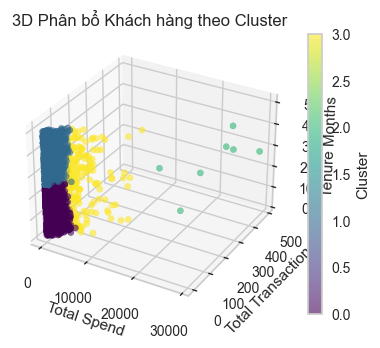

In [115]:
# 2.1 Biểu đồ 3D
ax = plt.subplot(2, 2, 1, projection='3d')
scatter = ax.scatter3D(
    customer_analystics['Total_Spend'],
    customer_analystics['Total_Transaction'],
    customer_analystics['Tenure_Months'],
    c=customer_analystics['Cluster'],
    cmap='viridis',
    alpha=0.6
)
ax.set_xlabel('Total Spend')
ax.set_ylabel('Total Transaction')
ax.set_zlabel('Tenure Months')
ax.set_title('3D Phân bổ Khách hàng theo Cluster')
plt.colorbar(scatter, label='Cluster')


In [116]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(
    x= customer_analystics['Total_Spend'],
    y= customer_analystics['Total_Transaction'],
    z= customer_analystics['Tenure_Months'],
    mode='markers',
     marker=dict(
        color = customer_analystics['Cluster'], 
        size= 10,
        line=dict(
            color= customer_analystics['Cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Trực quan phân khúc khách hàng dựa trên Tổng chi tiêu, Lượng giao dịch và Thời gian gắn bó',
    scene = dict(
            xaxis = dict(title  = 'Total_Spend'),
            yaxis = dict(title  = 'Total_Transaction'),
            zaxis = dict(title  = 'Tenure_Months')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

Text(0.5, 1.0, 'Ma trận Tương quan các Biến Số')

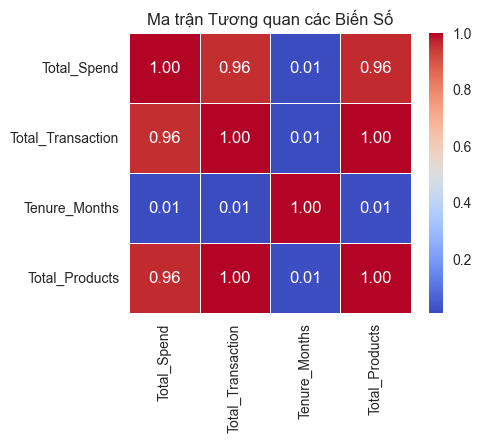

In [117]:
# 2.2 Heatmap tương quan
plt.subplot(2, 2, 2)
corr_matrix = customer_analystics[['Total_Spend', 'Total_Transaction', 'Tenure_Months', 'Total_Products']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Ma trận Tương quan các Biến Số')

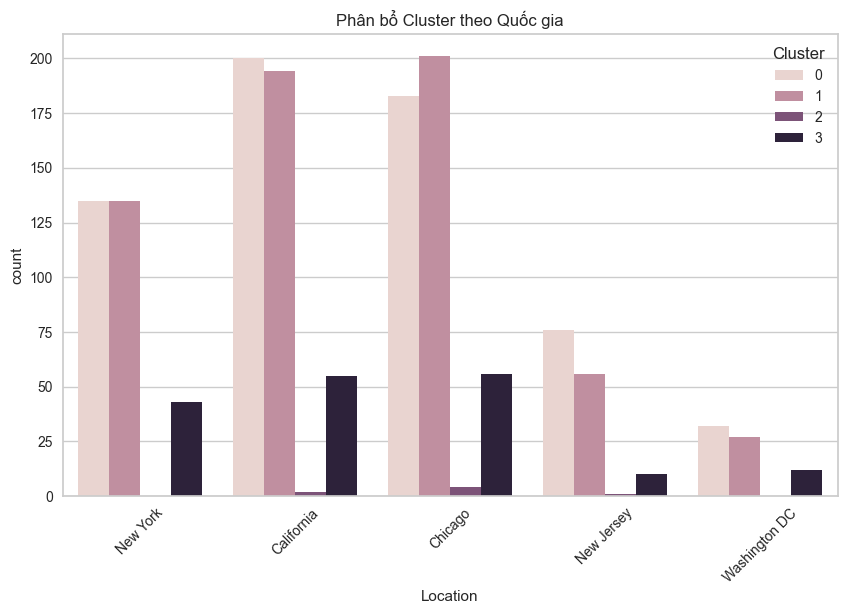

In [118]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Location', hue='Cluster', data=customer_analystics)
plt.title('Phân bổ Cluster theo Quốc gia')
plt.xticks(rotation=45)
plt.show()

In [127]:
import pandas as pd

# Hàm tính thống kê định lượng cho từng nhóm khách hàng
def quantitative_stats_per_cluster(df, cluster_names):
    for cluster in sorted(df['Cluster'].unique()):
        cluster_data = df[df['Cluster'] == cluster]

        # Tính các thống kê giống bảng trong ảnh
        stats = cluster_data[['Total_Transaction', 'Total_Products', 'Tenure_Months', 'Total_Spend']].describe()
        stats = stats.loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']].round(2)

        # Hiển thị thông tin nhóm khách hàng
        cluster_name = cluster_names.get(cluster, f"Nhóm {cluster}")
        print(f"\nTHỐNG KÊ ĐỊNH LƯỢNG - {cluster_name} (Cluster {cluster})")
        print("=" * 80)
        print(stats)
        print("=" * 80)

# Đặt tên cho các nhóm khách hàng
cluster_names = {
    0: "Khách hàng mới",
    1: "Khách hàng ngủ đông",
    2: "Khách hàng đặc biệt",
    3: "Khách hàng tiềm năng"
}

# Giả sử customer_analytics là DataFrame của bạn
quantitative_stats_per_cluster(customer_analystics, cluster_names)



THỐNG KÊ ĐỊNH LƯỢNG - Khách hàng mới (Cluster 0)
       Total_Transaction  Total_Products  Tenure_Months  Total_Spend
count             626.00          626.00         626.00       626.00
mean               16.95           21.02          13.88      1063.69
std                13.63           16.90           7.07       937.87
min                 1.00            1.00           2.00         7.06
25%                 6.00            8.00           8.00       296.94
50%                13.00           16.00          14.00       775.54
75%                25.00           32.00          20.00      1604.29
max                66.00           75.00          26.00      4883.14

THỐNG KÊ ĐỊNH LƯỢNG - Khách hàng ngủ đông (Cluster 1)
       Total_Transaction  Total_Products  Tenure_Months  Total_Spend
count              613.0          613.00         613.00       613.00
mean                16.7           20.72          38.23      1046.14
std                 12.9           15.99           7.11       904.2